# Deep Learning for Scene Classification

## Introduction

Welcome to this Deep Learning project focused on scene classification. The primary objective is to build and evaluate Deep Learning models that can accurately classify images into one of the six predefined categories: Buildings, Forests, Glaciers, Mountains, Oceans, and Streets.

In this Jupyter Notebook, you'll find:

- An exploration of the dataset to better understand its structure and contents.
- Pre-processing steps, including image transforms and augmentations, tailored specifically for this dataset.
- Implementation of Deep Learning models from scratch to solve the classification problem.
- Evaluation of models using metrics like Accuracy, Precision, Recall, and F1 Score.
- Visualizations and logs that track model performance during training and validation phases.

This project is implemented locally, and Conda is used for package management, ensuring that all dependencies are correctly set up for anyone who wishes to reproduce this work.

Let's get started!


## Imports

Before diving into the code, it's important to understand the role of each library being imported. Below are the key libraries and their significance in the context of this project.

In [33]:
# PyTorch is an open-source machine learning library used for a variety of tasks,
# but primarily for training deep neural networks.
import torch

# nn is a sub-module in PyTorch that contains useful classes and functions to build neural networks.
import torch.nn as nn

# F is a sub-module in PyTorch that contains useful functions for building neural networks.
import torch.nn.functional as F

# DataLoader is a PyTorch utility for loading and batching data efficiently.
from torch.utils.data import DataLoader

# torchvision contains various utilities, pre-trained models, and datasets specifically
# geared towards computer vision tasks.
import torchvision

# transforms are a set of common image transformations that are often required when
# working with image data.
from torchvision import transforms

# ImageFolder is a utility for loading images directly from a directory structure where
# each sub-directory represents a different class.
from torchvision.datasets import ImageFolder

# random_split is a utility function to randomly split a dataset into non-overlapping
# new datasets of given lengths.
from torch.utils.data import random_split


# SummaryWriter is a PyTorch utility for logging information to be displayed in TensorBoard.
from torch.utils.tensorboard import SummaryWriter

# summary is a PyTorch utility for displaying the summary of a PyTorch model.
from torchinfo import summary

# tqdm is a Python library that adds a progress bar to an iterable object.
from tqdm import tqdm

# Matplotlib is a plotting library that is useful for visualizing data, plotting graphs, etc.
import matplotlib.pyplot as plt

# NumPy is a library for numerical operations and is especially useful for array and
# matrix computations.
import numpy as np


# PIL is a library for image processing.
from PIL import Image

# os is a Python module that provides a portable way of using operating system dependent
import os

# time is a module that provides various time-related functions.
import time

# random is a module that implements pseudo-random number generators for various distributions.
import random

# accuracy_score computes the accuracy classification score.
# confusion_matrix computes confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# itertools is a module that provides various functions that work on iterators to produce
from itertools import product

# math is a module that provides access to the mathematical functions.
import math

## Checking CUDA Availability

In deep learning projects, it's common to leverage the power of GPUs for computation. CUDA is a parallel computing platform that allows us to use the GPU for these intensive calculations. The following code snippet checks if CUDA is available on the machine. If CUDA is available, it sets the device to "cuda"; otherwise, it falls back to using the CPU.

In [34]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

Using device: cuda


## Setting the Random Seed for Reproducibility

For any machine learning experiment, reproducibility is crucial. Setting a random seed ensures that the random numbers generated by our code are the same across different runs, making the results reproducible. In this project, the random seed is set for PyTorch.

In [35]:
SEED = 34
# Set the seed for generating random numbers
torch.manual_seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Tensorboard Setup

In [36]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Setting Constants

In [37]:
# constants
TRAIN_DIR = "data/train_set"
TEST_DIR = "data/test_set"
CLASSES = os.listdir(TRAIN_DIR)
CLASSES_COUNT = len(CLASSES)
CPU_COUNT = os.cpu_count()
NUM_WORKERS = CPU_COUNT // 2 if CPU_COUNT else 1

## Exploratory Data Analysis (EDA)

### Introduction

The Exploratory Data Analysis (EDA) phase is an essential step in any data science or machine learning project. The primary objective of EDA is to gain insights into the dataset, understand its complexity, and discover underlying patterns, while also identifying outliers and anomalies that could impact the performance of machine learning models. The information gathered during EDA informs feature engineering, data cleaning, and ultimately, model selection and tuning. 

This section of the documentation will walk you through various components of the EDA process. From understanding the basic statistics and quality of the data to employing visual techniques for more complex and informative insights, we'll cover it all. 

Given the image-based nature of the dataset, our EDA will be tailored towards visual data. Specific focus areas will include image size distributions, class distributions, and data quality. By the end of this section, you should have a comprehensive understanding of the data's characteristics and peculiarities, empowering you to make well-informed decisions for the subsequent phases of the project.

### Sections in this EDA:

1. **Data Overview**: Provides a snapshot of the dataset, including its size and dimensions.
2. **Visualization**: Includes various data visualizations to better understand the data's features and labels.
3. **Image Characteristics**: Examines the properties of images in the dataset.


### Data Overview

#### Introduction

In this section, we will take an initial look at the dataset to understand its basic characteristics such as size, dimensions, and type of data. Understanding the data's structure is essential for later stages where more specific analyses and modeling will take place.

#### Key Points

- **Total Number of Train Images**: Number of images in the train dataset.
- **Class Distribution**: The number of images per class.
- **Image Dimensions**: Common or range of dimensions (width x height) among the dataset images.

#### Total Number of Train Images

In [38]:
total_tain_images = sum([len(files) for subdir, dirs, files in os.walk(TRAIN_DIR)])
total_test_images = sum([len(files) for subdir, dirs, files in os.walk(TEST_DIR)])
print(f"Total number of train images: {total_tain_images}")
print(f"Total number of test images: {total_test_images}")

Total number of train images: 14034
Total number of test images: 3000


We have a total of 14,034 images in our dataset. Given that this is an educational project, this should be more than sufficient for training a robust model. Large datasets are generally beneficial for deep learning models, providing them with more opportunities to learn nuanced features across different classes. Therefore, data scarcity is not a concern for us in this particular project.

#### Class Distribution

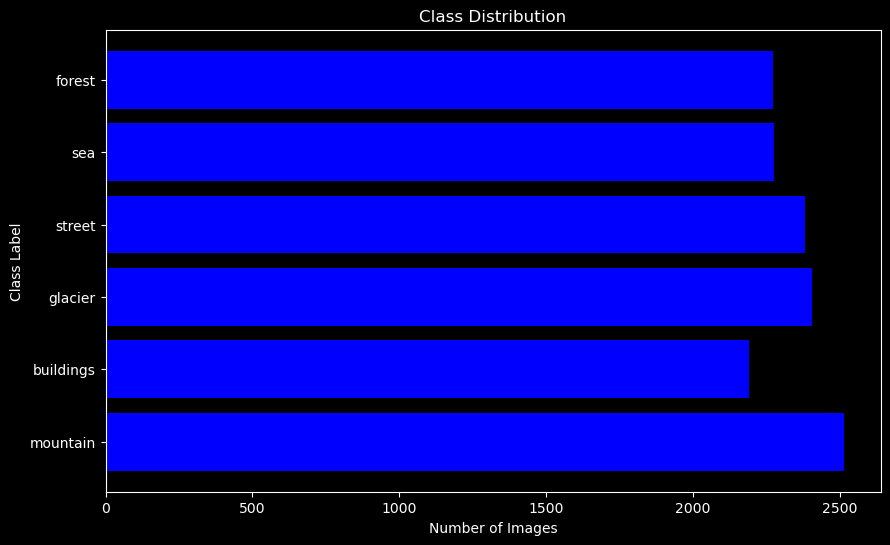

In [39]:
train_labels = os.listdir(TRAIN_DIR)
label_counter = {}
for folder in train_labels:
    folder_path = os.path.join(TRAIN_DIR, folder)
    num_files = len(os.listdir(folder_path))
    label_counter[folder] = num_files

classes = list(label_counter.keys())
count = list(label_counter.values())

plt.figure(figsize=(10, 6))
plt.barh(classes, count, color="blue")

plt.xlabel("Number of Images")
plt.ylabel("Class Label")
plt.title("Class Distribution")
plt.show()

The dataset exhibits a balanced distribution across different classes, which is advantageous for the learning process. This removes the need for techniques such as class balancing during training, simplifying the model development process.

#### Image Dimensions
In this section, we aim to explore the dimensions of the images in our dataset. Understanding the size and format of the images can provide insights into the preprocessing steps needed, as well as help in designing the architecture of the neural network.

In [40]:
image_sizes = []

for class_folder in os.listdir(TRAIN_DIR):
    class_folder_path = os.path.join(TRAIN_DIR, class_folder)

    if os.path.isdir(class_folder_path):
        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)

            with Image.open(image_path) as img:
                width, height = img.size
                image_sizes.append((width, height))

# Compute some statistics
avg_size = np.mean(image_sizes, axis=0)
min_size = np.min(image_sizes, axis=0)
max_size = np.max(image_sizes, axis=0)

print(f"Average Size: {avg_size}")
print(f"Minimum Size: {min_size}")
print(f"Maximum Size: {max_size}")

Average Size: [150.         149.90872168]
Minimum Size: [150  76]
Maximum Size: [150 150]


We found that not all images have the same dimensions (150x150). Therefore, when loading the images, we will apply the corresponding transformation to standardize their size.

In [41]:
atypical_images = []

for class_folder in os.listdir(TRAIN_DIR):
    class_folder_path = os.path.join(TRAIN_DIR, class_folder)

    if os.path.isdir(class_folder_path):
        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)

            with Image.open(image_path) as img:
                width, height = img.size
                if width != 150 or height != 150:
                    atypical_images.append((image_path, (width, height)))


# Display the atypical images
if atypical_images:
    print(f"Atypical image sizes found({len(atypical_images)}):")
    for img_path, size in atypical_images:
        print(f"{img_path}: {size}")
else:
    print("No atypical images found.")

Atypical image sizes found(48):
data/train_set/mountain/11873.jpg: (150, 134)
data/train_set/mountain/13656.jpg: (150, 123)
data/train_set/mountain/5171.jpg: (150, 143)
data/train_set/mountain/17021.jpg: (150, 136)
data/train_set/mountain/6057.jpg: (150, 146)
data/train_set/mountain/14575.jpg: (150, 142)
data/train_set/mountain/14462.jpg: (150, 113)
data/train_set/mountain/18823.jpg: (150, 144)
data/train_set/mountain/16041.jpg: (150, 144)
data/train_set/mountain/8163.jpg: (150, 147)
data/train_set/mountain/5371.jpg: (150, 141)
data/train_set/mountain/9286.jpg: (150, 131)
data/train_set/mountain/6633.jpg: (150, 145)
data/train_set/mountain/4513.jpg: (150, 100)
data/train_set/mountain/7400.jpg: (150, 81)
data/train_set/mountain/13200.jpg: (150, 135)
data/train_set/mountain/16971.jpg: (150, 103)
data/train_set/buildings/5358.jpg: (150, 124)
data/train_set/glacier/7512.jpg: (150, 135)
data/train_set/glacier/3148.jpg: (150, 97)
data/train_set/glacier/1010.jpg: (150, 110)
data/train_set/gla

### Visualization



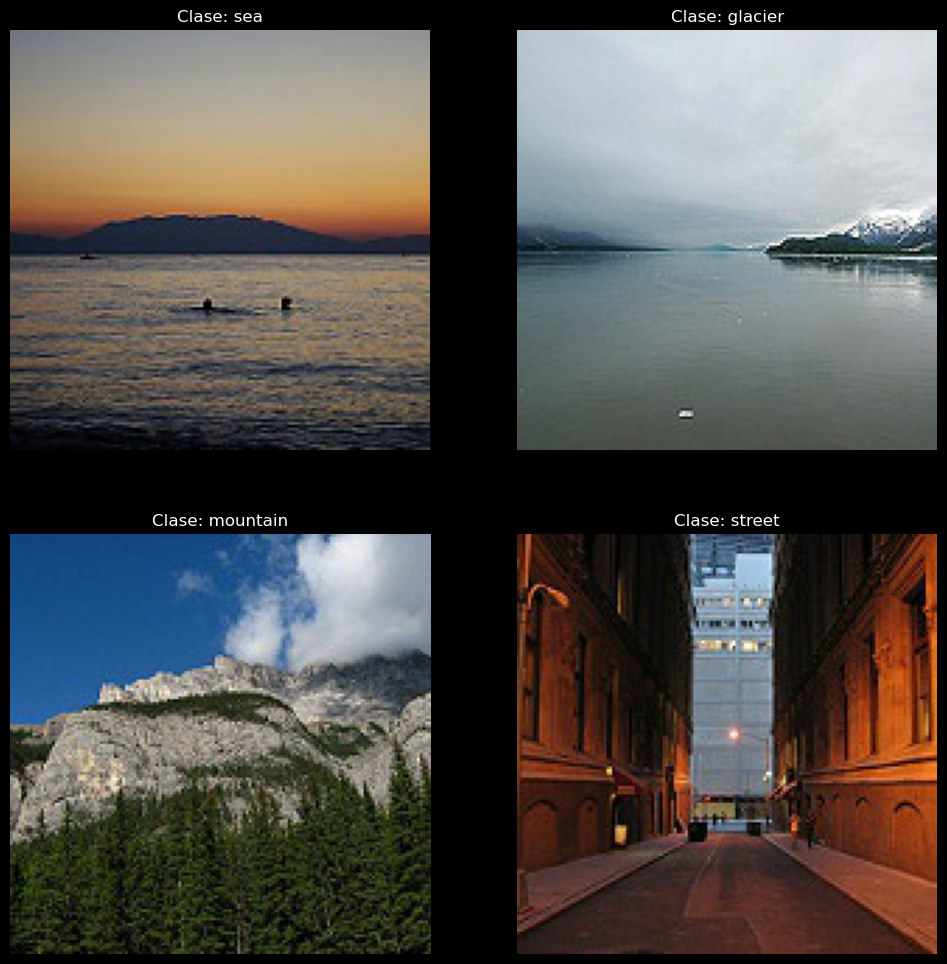

In [42]:
random_classes = random.sample(CLASSES, 4)

plt.figure(figsize=(12, 12))

for idx, random_class in enumerate(random_classes):
    # Obtener una lista de todas las imágenes en una clase específica
    img_list = os.listdir(os.path.join(TRAIN_DIR, random_class))

    # Seleccionar una imagen al azar de la lista
    random_img_name = random.choice(img_list)

    # Ruta a la imagen
    img_path = os.path.join(TRAIN_DIR, random_class, random_img_name)

    # Cargar la imagen
    img = Image.open(img_path)

    # Mostrar la imagen
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Clase: {random_class}")

plt.show()

## Data Preprocessing and Loading

In this section, we deal with the vital aspect of preparing our data. These steps can significantly influence the model's performance.

- **Data Loading**: The ImageFolder class from torchvision is used to load our dataset from the disk.
- **Transformations**: The dataset is transformed to standardize the image size and apply data augmentation techniques such as random horizontal flips and random rotations.
- **Data Splitting**: The dataset is split into training and validation sets. 80% of the data is used for training, and the remaining 20% is used for validation.
- **DataLoader**: Finally, PyTorch's DataLoader is used to create mini-batches of data, which allows for more efficient model training.

By the end of this section, we have DataLoader instances for the training, validation, and testing sets, which can be used to train and evaluate the model.

In [71]:
def get_dataloaders(image_size, batch_size):
    
    # Create transforms for data augmentation
    train_transform = transforms.Compose(
        [
            transforms.Resize((image_size, image_size)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.RandomVerticalFlip(p=0.2),
            transforms.ToTensor(),  # Convert PIL Image to PyTorch tensor
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]
    )

    test_transform = transforms.Compose(
        [
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),  # Convert PIL Image to PyTorch tensor
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]
    )

    # Load the training and test datasets from disk
    train_dataset = ImageFolder(TRAIN_DIR, transform=train_transform)
    test_dataset = ImageFolder(TEST_DIR, transform=test_transform)

    # Split the dataset into training and validation sets
    train_size = int(0.8 * len(train_dataset))
    valid_size = len(train_dataset) - train_size
    train_subset, validation_subset = random_split(train_dataset, [train_size, valid_size])

    # Create DataLoader instances to load data in batches
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=NUM_WORKERS)
    val_loader = DataLoader(validation_subset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=NUM_WORKERS)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=NUM_WORKERS)

    return train_loader, val_loader, test_loader

## Hyperparameters Used
This project involves training neural network models with various combinations of hyperparameters to identify the most effective setup for a given task. The main script includes functions for model training, monitoring, and evaluation, and utilizes different sets of hyperparameters for extensive experimentation.

The hyperparameters under consideration include the learning rate, batch size, type of optimizer, image size for data preprocessing, and the number of epochs for training.

The loss function used for the training is Cross-Entropy Loss. It is initialized and moved to the appropriate device (CPU or GPU).


In [44]:
LEARNING_RATES = [0.01, 0.001, 0.0001, ]
BATCH_SIZES = [32, 64, 128]
OPTMIZERS = ['SGD', 'Adam']
IMAGES_SIZES = [32, 64, 128]
EPOCHS = [30, 100]

criterion = nn.CrossEntropyLoss().to(device)

## Utility Functions for Model Training and Evaluation

In this section, we present a set of utility functions designed to facilitate the training, monitoring, and evaluation processes for various neural network architectures. By creating these generic functions, we aim to make the process of experimenting with different architectures more streamlined and comparable.

### Monitoring Function

This function assists in keeping track of important metrics like loss and accuracy during the training and validation phases. The function uses TensorBoard's SummaryWriter to log these metrics for easy visualization.

```python
def monitor_metrics(writer, epoch_num, loss, accuracy, phase):
```

### Training Function

This function handles the training process for each epoch, iterating over batches of data and updating the model parameters.

```python
def train_model(model, criterion, optimizer, train_loader, num_epochs=10):
```

### Running an Epoch

This function is called in each epoch during the training and evaluation phases. It performs forward and backward passes and computes loss and accuracy for the epoch.

```python
def run_epoch(epoch_num, model, loader, criterion, writer, optim=None, do_logging=False, is_training=True):
```

### Hyperparameter Tuning Function

This function is responsible for finding the best model given a set of hyperparameters. It trains models for all possible combinations of learning rates, batch sizes, optimizer types, image sizes, and epochs, and saves the best-performing model based on accuracy.

The `model_generator` functions a crucial role in the hyperparameter tuning process. It is responsible for generating a fresh instance of the neural network model based on certain parameters, such as `image_size`. This allows us to experiment with different model architectures and hyperparameters.

```python
def find_best_model(model_generator):
```

### Evaluation Function

After training, this function evaluates the performance of the model on a test dataset and generates useful metrics such as precision, recall, and F1-score.

```python
def evaluate_model(model, test_loader):
```

In [89]:
def monitor_metrics(writer, epoch_num, loss, accuracy, phase):
    writer.add_scalar(f'{phase} loss', loss, epoch_num)
    writer.add_scalar(f'{phase} accuracy', accuracy, epoch_num)

def run_epoch(epoch_num, model, loader, criterion, writer, optim=None, do_logging=False, is_training=True):
    if is_training:
        model.train()
        epoch_type = "Training"
    else:
        model.eval()
        epoch_type = "Validation"

    epoch_loss = 0.0
    all_labels = []
    all_predictions = []

    with torch.set_grad_enabled(
        is_training
    ):  # set gradient calculation to True or False depending on mode
        for images, labels in loader:
            all_labels.extend(labels.numpy())

            if is_training:
                optim.zero_grad()  # reset the gradients to 0 for all learnable parameters

            predictions = model(images.to(device))  # forward pass
            all_predictions.extend(
                torch.argmax(predictions, dim=1).cpu().numpy()
            )  # get the predicted class with highest probability

            loss = criterion(predictions, labels.to(device))  # compute the loss

            if is_training:
                loss.backward()  # compute the gradients for each learnable parameter
                optim.step()  # update the weights

            epoch_loss += loss.item()  # accumulate the loss for each batch

    avg_loss = epoch_loss / len(loader)  # compute the average loss for the epoch
    accuracy = (
        accuracy_score(all_labels, all_predictions) * 100
    )  # compute the accuracy for the epoch

    if do_logging:
        monitor_metrics(writer, epoch_num, avg_loss, accuracy, epoch_type)

    return avg_loss, accuracy


def train_model(
    model, train_loader, val_loader, criterion, optim, number_epochs, do_logging = False, logging_name = "log", patience=10
):
    best_val_loss = float("inf")
    writer = None

    if do_logging:
        writer = SummaryWriter('runs/' + model.name + "/" + logging_name)

    for epoch in tqdm(range(number_epochs)):
        # Train the model for one epoch
        run_epoch(
            epoch + 1, model, train_loader, criterion, writer, optim, do_logging, is_training=True
        )

        # Evaluate the model against validation set
        test_loss, _ = run_epoch(
            epoch + 1, model, val_loader, criterion, writer, do_logging, is_training=False
        )

        
        # early stopping: if the validation loss does not decrease for 10 consecutive epochs, stop training
        if test_loss < best_val_loss:
            best_val_loss = test_loss
            counter = 0 
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping")
                break


def train_model_with_hyperparameters(model_generator, lr, batch_size, optimizer_type, image_size, number_of_epochs):
    torch.manual_seed(SEED)
    random.seed(SEED)

    print(f"Training model with lr={lr}, batch_size={batch_size}, optimizer={optimizer_type}, image_size={image_size}, epoch={number_of_epochs}")

    train_loader, valid_loader, _ = get_dataloaders(
        image_size, batch_size
    )

    # Create the model
    model = model_generator(image_size).to(device)

    # Create the optimizer
    if optimizer_type == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    elif optimizer_type == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    else:
        raise Exception('Invalid optimizer type')
    
    logging_name = f"{model.name}-lr={lr}-ba={batch_size}-opt={optimizer_type}-img={image_size}"

    # Train the model
    train_model(model, train_loader, valid_loader, criterion, optimizer, number_of_epochs, True, logging_name)
    # Evaluate the model
    model_accuracy, _, _, _, _, _ = evaluate_model(model, valid_loader)

    return model, model_accuracy


def find_best_model(model_generator):
    best_accuracy = 0.0
    best_params = {}
    best_model = None


    # use itertools.product to get all possible combinations of hyperparameters
    all_combinations = list(product(LEARNING_RATES, BATCH_SIZES, OPTMIZERS, IMAGES_SIZES, EPOCHS))
    current_combination = 0
    total_combination_runs = len(all_combinations)

    # Iterate over all combinations
    for combination in all_combinations:
        lr, batch_size, optimizer_type, image_size, number_of_epochs = combination

        current_combination += 1
        print(f"Running combination {current_combination}/{total_combination_runs}")
        model, model_accuracy = train_model_with_hyperparameters(model_generator, lr, batch_size, optimizer_type, image_size, number_of_epochs)

        
        print(f"Accuracy: {model_accuracy:.2f}% \n")

        # Free up GPU memory
        if device == 'cuda':
            torch.cuda.empty_cache()

        # Save the best hyperparameters
        if model_accuracy > best_accuracy:
            best_accuracy = model_accuracy
            best_params = {
                "lr": lr,
                "batch_size": batch_size,
                "optimizer_type": optimizer_type,
                "image_size": image_size,
                "number_of_epochs": number_of_epochs,
            }
            best_model = model
            
    print(f"Best accuracy: {best_accuracy}")
    print(f"Best hyperparameters: {best_params}")

    return best_model, best_params


def evaluate_model(model, test_loader):
    all_labels = []
    all_predictions = []
    model.eval()
    with torch.no_grad():
        for _, (images, labels) in enumerate(test_loader):
            all_labels.extend(labels.numpy())

            predictions = model(images.to(device))  # forward pass
            all_predictions.extend(
                torch.argmax(predictions, dim=1).cpu().numpy()
            )  # get the predicted class with highest probability

    accuracy = accuracy_score(all_labels, all_predictions) * 100
    precision = precision_score(all_labels, all_predictions, average="macro", zero_division=1)*100
    recall = recall_score(all_labels, all_predictions, average="macro")*100
    f1 = f1_score(all_labels, all_predictions, average="macro")*100

    return accuracy, precision, recall, f1, all_labels, all_predictions

def print_metrics(accuracy, precision, recall, f1, labels, predicions):
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1: {f1:.2f}%")

    # Compute confusion matrix
    cm = confusion_matrix(labels, predicions)
    print("\n Confusion Matrix: \n")
    print(cm)

## Project Solutions Overview

In this project, we aim to build and evaluate various neural network architectures to solve our specific classification problem. We will approach this task by employing three distinct architectures, each with its unique characteristics and advantages:

### Baseline Model
Our baseline model will be a simple Convolutional Neural Network (CNN) with a minimal number of layers. This model will consist of a few convolutional layers followed by pooling layers and fully connected layers towards the end. The purpose of establishing a baseline is to have a point of reference against which we can measure the performance of more complex models.

### ResNet Architecture
As our second model, we will use the [ResNet (Residual Network)](https://arxiv.org/pdf/1512.03385.pdf) architecture, which is well-known for its excellent performance in image classification tasks. ResNet introduces "skip connections" that bypass one or more layers, allowing for deeper networks without the problem of vanishing gradients. 

### DenseNet Architecture
Lastly, we will use [DenseNet (Densely Connected Convolutional Networks)](https://arxiv.org/pdf/1608.06993.pdf) for our third model. This architecture improves upon ResNet by connecting each layer to every other layer in a feed-forward fashion, thereby increasing computational efficiency and enhancing feature propagation.

---

## Working Modalities

### Data Splitting
The dataset will be partitioned into three sets: training, validation, and testing sets. 

### Hyperparameter Tuning
We will carry out multiple runs with different hyperparameters, using the validation set as our benchmark. After tuning the models to satisfaction on the validation set, they will be locked, and final evaluations will be performed on the test set.

### Evaluation Metrics
To evaluate the models, we will use a range of metrics suitable for multi-class classification problems. These include:
- `accuracy_score`: Overall accuracy of the model.
- `confusion_matrix`: To understand the classification errors.
- `precision_score`: Measures the accuracy of positive predictions.
- `recall_score`: Measures the ability to find all positive instances.
- `f1_score`: Harmonic mean of precision and recall.

By employing these metrics, we aim to provide a comprehensive evaluation of each model's performance.

---

## SimpleCNN: The Baseline Model

### Introduction
SimpleCNN is designed to serve as the baseline model for our image classification problem. It is a straightforward convolutional neural network (CNN) that captures essential features from images while remaining computationally inexpensive. This makes it an ideal starting point to understand the basic performance metrics we can achieve and sets the stage for comparison with more complex architectures.

### Architecture
The architecture is uncomplicated, consisting of three main blocks:

#### Convolutional Layers
- **Conv1**: A 3x3 convolutional layer with 16 filters, followed by a ReLU activation.
- **Conv2**: Another 3x3 convolutional layer with 32 filters, followed by a ReLU activation.
- **Conv3**: A final 3x3 convolutional layer with 64 filters, also followed by a ReLU activation.

Each convolutional layer is accompanied by a max-pooling layer with a size of 2x2, which reduces the dimensions of the image while keeping the important features.

#### Fully Connected Layers
- **FC1**: A fully connected layer with a ReLU activation that outputs to 512 units.
- **FC2**: Another fully connected layer that outputs to the number of classes in the dataset.

### Forward Propagation
The forward propagation steps are intuitive and simple to follow:
1. The image first passes through the three convolutional layers (`conv1`, `conv2`, `conv3`), each followed by a ReLU activation and max-pooling.
2. The output is then flattened and passed through the first fully connected layer (`fc1`) with a ReLU activation.
3. Finally, the output goes through the last fully connected layer (`fc2`) to produce the class scores.

### Why SimpleCNN?
SimpleCNN serves as a no-frills approach to understanding what the bare minimum architecture can achieve. It sets the stage for implementing and comparing more advanced models like ResNet and DenseNet. Although SimpleCNN may not produce state-of-the-art results, it gives us a valuable point of reference for gauging the performance of subsequent architectures.



In [46]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes, img_size):
        super(SimpleCNN, self).__init__()
        self.name = "SimpleCNN"
        
        fc_size = img_size // 8

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * fc_size * fc_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)

        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)

        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.max_pool2d(x, 2)

        x = x.view(x.size(0), -1)

        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [47]:
LEARNING_RATES = [0.01, 0.001, 0.0001]
BATCH_SIZES = [64, 128, 256]
OPTMIZERS = ['SGD', 'Adam']
IMAGES_SIZES = [32, 64, 128]
EPOCHS = [100]

# this function generates a simple CNN model with the given image size
def generate_simple_cnn_model(image_size):
    return SimpleCNN(CLASSES_COUNT, image_size)

# find the best model using different hyperparameters combination and keep the best one (based on accuracy of validation set)
best_simple_cnn_model, best_params = find_best_model(generate_simple_cnn_model)


# load the test dataset
_, _, test_loader = get_dataloaders(
        best_params['image_size'], 128
    )

torch.save(best_simple_cnn_model.state_dict(), 'best_simple_cnn_model.pth')

# evaluate the best model on the test set
accuracy, precision, recall, f1, all_labels, all_predictions = evaluate_model(best_simple_cnn_model, test_loader)
print_metrics(accuracy, precision, recall, f1, all_labels, all_predictions)

Running combination 1/54
Training model with lr=0.01, batch_size=64, optimizer=SGD, image_size=32, epoch=100


 30%|███       | 30/100 [00:39<01:32,  1.32s/it]

Early stopping


Accuracy: 77.09% 

Running combination 2/54
Training model with lr=0.01, batch_size=64, optimizer=SGD, image_size=64, epoch=100


 30%|███       | 30/100 [00:42<01:40,  1.43s/it]

Early stopping


Accuracy: 81.05% 

Running combination 3/54
Training model with lr=0.01, batch_size=64, optimizer=SGD, image_size=128, epoch=100


 30%|███       | 30/100 [00:58<02:17,  1.97s/it]

Early stopping


Accuracy: 82.29% 

Running combination 4/54
Training model with lr=0.01, batch_size=64, optimizer=Adam, image_size=32, epoch=100


 29%|██▉       | 29/100 [00:38<01:33,  1.32s/it]

Early stopping


Accuracy: 67.30% 

Running combination 5/54
Training model with lr=0.01, batch_size=64, optimizer=Adam, image_size=64, epoch=100


 28%|██▊       | 28/100 [00:39<01:42,  1.42s/it]

Early stopping


Accuracy: 67.26% 

Running combination 6/54
Training model with lr=0.01, batch_size=64, optimizer=Adam, image_size=128, epoch=100


 15%|█▌        | 15/100 [00:30<02:55,  2.06s/it]

Early stopping


Accuracy: 17.35% 

Running combination 7/54
Training model with lr=0.01, batch_size=128, optimizer=SGD, image_size=32, epoch=100


 42%|████▏     | 42/100 [00:54<01:15,  1.30s/it]

Early stopping


Accuracy: 78.77% 

Running combination 8/54
Training model with lr=0.01, batch_size=128, optimizer=SGD, image_size=64, epoch=100


 40%|████      | 40/100 [00:56<01:24,  1.41s/it]

Early stopping


Accuracy: 80.90% 

Running combination 9/54
Training model with lr=0.01, batch_size=128, optimizer=SGD, image_size=128, epoch=100


 27%|██▋       | 27/100 [00:57<02:34,  2.12s/it]

Early stopping


Accuracy: 84.04% 

Running combination 10/54
Training model with lr=0.01, batch_size=128, optimizer=Adam, image_size=32, epoch=100


 25%|██▌       | 25/100 [00:32<01:37,  1.30s/it]

Early stopping


Accuracy: 69.43% 

Running combination 11/54
Training model with lr=0.01, batch_size=128, optimizer=Adam, image_size=64, epoch=100


 42%|████▏     | 42/100 [01:00<01:23,  1.44s/it]

Early stopping


Accuracy: 72.85% 

Running combination 12/54
Training model with lr=0.01, batch_size=128, optimizer=Adam, image_size=128, epoch=100


 25%|██▌       | 25/100 [00:53<02:39,  2.13s/it]

Early stopping


Accuracy: 70.00% 

Running combination 13/54
Training model with lr=0.01, batch_size=256, optimizer=SGD, image_size=32, epoch=100


 67%|██████▋   | 67/100 [01:24<00:41,  1.27s/it]

Early stopping


Accuracy: 79.05% 

Running combination 14/54
Training model with lr=0.01, batch_size=256, optimizer=SGD, image_size=64, epoch=100


 45%|████▌     | 45/100 [01:05<01:20,  1.46s/it]

Early stopping


Accuracy: 80.62% 

Running combination 15/54
Training model with lr=0.01, batch_size=256, optimizer=SGD, image_size=128, epoch=100


 40%|████      | 40/100 [01:28<02:12,  2.21s/it]

Early stopping


Accuracy: 83.18% 

Running combination 16/54
Training model with lr=0.01, batch_size=256, optimizer=Adam, image_size=32, epoch=100


 32%|███▏      | 32/100 [00:42<01:29,  1.31s/it]

Early stopping


Accuracy: 74.96% 

Running combination 17/54
Training model with lr=0.01, batch_size=256, optimizer=Adam, image_size=64, epoch=100


 34%|███▍      | 34/100 [00:50<01:37,  1.48s/it]

Early stopping


Accuracy: 75.35% 

Running combination 18/54
Training model with lr=0.01, batch_size=256, optimizer=Adam, image_size=128, epoch=100


 47%|████▋     | 47/100 [01:43<01:57,  2.21s/it]

Early stopping


Accuracy: 74.56% 

Running combination 19/54
Training model with lr=0.001, batch_size=64, optimizer=SGD, image_size=32, epoch=100


100%|██████████| 100/100 [02:08<00:00,  1.28s/it]


Accuracy: 77.95% 

Running combination 20/54
Training model with lr=0.001, batch_size=64, optimizer=SGD, image_size=64, epoch=100


 86%|████████▌ | 86/100 [02:01<00:19,  1.41s/it]

Early stopping


Accuracy: 80.83% 

Running combination 21/54
Training model with lr=0.001, batch_size=64, optimizer=SGD, image_size=128, epoch=100


 57%|█████▋    | 57/100 [01:52<01:24,  1.97s/it]

Early stopping


Accuracy: 82.54% 

Running combination 22/54
Training model with lr=0.001, batch_size=64, optimizer=Adam, image_size=32, epoch=100


 34%|███▍      | 34/100 [00:45<01:27,  1.33s/it]

Early stopping


Accuracy: 78.98% 

Running combination 23/54
Training model with lr=0.001, batch_size=64, optimizer=Adam, image_size=64, epoch=100


 30%|███       | 30/100 [00:43<01:41,  1.45s/it]

Early stopping


Accuracy: 81.72% 

Running combination 24/54
Training model with lr=0.001, batch_size=64, optimizer=Adam, image_size=128, epoch=100


 21%|██        | 21/100 [00:42<02:41,  2.04s/it]

Early stopping


Accuracy: 82.58% 

Running combination 25/54
Training model with lr=0.001, batch_size=128, optimizer=SGD, image_size=32, epoch=100


100%|██████████| 100/100 [02:06<00:00,  1.26s/it]


Accuracy: 76.52% 

Running combination 26/54
Training model with lr=0.001, batch_size=128, optimizer=SGD, image_size=64, epoch=100


 69%|██████▉   | 69/100 [01:37<00:43,  1.41s/it]

Early stopping


Accuracy: 78.59% 

Running combination 27/54
Training model with lr=0.001, batch_size=128, optimizer=SGD, image_size=128, epoch=100


 73%|███████▎  | 73/100 [02:30<00:55,  2.07s/it]

Early stopping


Accuracy: 82.51% 

Running combination 28/54
Training model with lr=0.001, batch_size=128, optimizer=Adam, image_size=32, epoch=100


 44%|████▍     | 44/100 [00:57<01:12,  1.30s/it]

Early stopping


Accuracy: 79.34% 

Running combination 29/54
Training model with lr=0.001, batch_size=128, optimizer=Adam, image_size=64, epoch=100


 30%|███       | 30/100 [00:42<01:39,  1.43s/it]

Early stopping


Accuracy: 80.37% 

Running combination 30/54
Training model with lr=0.001, batch_size=128, optimizer=Adam, image_size=128, epoch=100


 25%|██▌       | 25/100 [00:53<02:40,  2.13s/it]

Early stopping


Accuracy: 82.15% 

Running combination 31/54
Training model with lr=0.001, batch_size=256, optimizer=SGD, image_size=32, epoch=100


100%|██████████| 100/100 [02:08<00:00,  1.29s/it]


Accuracy: 71.43% 

Running combination 32/54
Training model with lr=0.001, batch_size=256, optimizer=SGD, image_size=64, epoch=100


100%|██████████| 100/100 [02:24<00:00,  1.44s/it]


Accuracy: 75.81% 

Running combination 33/54
Training model with lr=0.001, batch_size=256, optimizer=SGD, image_size=128, epoch=100


100%|██████████| 100/100 [03:36<00:00,  2.16s/it]


Accuracy: 80.83% 

Running combination 34/54
Training model with lr=0.001, batch_size=256, optimizer=Adam, image_size=32, epoch=100


 58%|█████▊    | 58/100 [01:15<00:54,  1.30s/it]

Early stopping


Accuracy: 79.23% 

Running combination 35/54
Training model with lr=0.001, batch_size=256, optimizer=Adam, image_size=64, epoch=100


 52%|█████▏    | 52/100 [01:16<01:10,  1.47s/it]

Early stopping


Accuracy: 81.47% 

Running combination 36/54
Training model with lr=0.001, batch_size=256, optimizer=Adam, image_size=128, epoch=100


 31%|███       | 31/100 [01:09<02:35,  2.25s/it]

Early stopping


Accuracy: 83.58% 

Running combination 37/54
Training model with lr=0.0001, batch_size=64, optimizer=SGD, image_size=32, epoch=100


100%|██████████| 100/100 [02:09<00:00,  1.29s/it]


Accuracy: 63.98% 

Running combination 38/54
Training model with lr=0.0001, batch_size=64, optimizer=SGD, image_size=64, epoch=100


100%|██████████| 100/100 [02:19<00:00,  1.39s/it]


Accuracy: 70.54% 

Running combination 39/54
Training model with lr=0.0001, batch_size=64, optimizer=SGD, image_size=128, epoch=100


100%|██████████| 100/100 [03:13<00:00,  1.94s/it]


Accuracy: 74.28% 

Running combination 40/54
Training model with lr=0.0001, batch_size=64, optimizer=Adam, image_size=32, epoch=100


100%|██████████| 100/100 [02:10<00:00,  1.30s/it]


Accuracy: 77.48% 

Running combination 41/54
Training model with lr=0.0001, batch_size=64, optimizer=Adam, image_size=64, epoch=100


 97%|█████████▋| 97/100 [02:18<00:04,  1.43s/it]

Early stopping


Accuracy: 80.41% 

Running combination 42/54
Training model with lr=0.0001, batch_size=64, optimizer=Adam, image_size=128, epoch=100


 52%|█████▏    | 52/100 [01:43<01:35,  1.99s/it]

Early stopping


Accuracy: 82.47% 

Running combination 43/54
Training model with lr=0.0001, batch_size=128, optimizer=SGD, image_size=32, epoch=100


100%|██████████| 100/100 [02:06<00:00,  1.26s/it]


Accuracy: 55.68% 

Running combination 44/54
Training model with lr=0.0001, batch_size=128, optimizer=SGD, image_size=64, epoch=100


100%|██████████| 100/100 [02:18<00:00,  1.38s/it]


Accuracy: 62.02% 

Running combination 45/54
Training model with lr=0.0001, batch_size=128, optimizer=SGD, image_size=128, epoch=100


100%|██████████| 100/100 [03:24<00:00,  2.04s/it]


Accuracy: 69.36% 

Running combination 46/54
Training model with lr=0.0001, batch_size=128, optimizer=Adam, image_size=32, epoch=100


100%|██████████| 100/100 [02:05<00:00,  1.26s/it]


Accuracy: 75.99% 

Running combination 47/54
Training model with lr=0.0001, batch_size=128, optimizer=Adam, image_size=64, epoch=100


100%|██████████| 100/100 [02:19<00:00,  1.39s/it]


Accuracy: 78.91% 

Running combination 48/54
Training model with lr=0.0001, batch_size=128, optimizer=Adam, image_size=128, epoch=100


 79%|███████▉  | 79/100 [02:43<00:43,  2.07s/it]

Early stopping


Accuracy: 82.22% 

Running combination 49/54
Training model with lr=0.0001, batch_size=256, optimizer=SGD, image_size=32, epoch=100


100%|██████████| 100/100 [02:06<00:00,  1.27s/it]


Accuracy: 47.70% 

Running combination 50/54
Training model with lr=0.0001, batch_size=256, optimizer=SGD, image_size=64, epoch=100


100%|██████████| 100/100 [02:22<00:00,  1.42s/it]


Accuracy: 55.33% 

Running combination 51/54
Training model with lr=0.0001, batch_size=256, optimizer=SGD, image_size=128, epoch=100


100%|██████████| 100/100 [03:36<00:00,  2.16s/it]


Accuracy: 63.16% 

Running combination 52/54
Training model with lr=0.0001, batch_size=256, optimizer=Adam, image_size=32, epoch=100


100%|██████████| 100/100 [02:06<00:00,  1.27s/it]


Accuracy: 73.71% 

Running combination 53/54
Training model with lr=0.0001, batch_size=256, optimizer=Adam, image_size=64, epoch=100


 92%|█████████▏| 92/100 [02:12<00:11,  1.44s/it]

Early stopping


Accuracy: 77.41% 

Running combination 54/54
Training model with lr=0.0001, batch_size=256, optimizer=Adam, image_size=128, epoch=100


100%|██████████| 100/100 [03:35<00:00,  2.16s/it]


Accuracy: 81.05% 

Best accuracy: 84.03990024937656
Best hyperparameters: {'lr': 0.01, 'batch_size': 128, 'optimizer_type': 'SGD', 'image_size': 128, 'number_of_epochs': 100}
Accuracy: 40.87%
Precision: 0.62
Recall: 0.40
F1: 0.34
[[ 47   0  16  56 233  85]
 [  1  20   5   6 237 205]
 [  0   0 103 319 127   4]
 [  0   0  17 396 112   0]
 [  0   0   7 108 394   1]
 [  3   0  25  13 194 266]]


In [94]:
_, _, test_loader = get_dataloaders(
        128, 128
    )
scnn_accuracy, scnn_precision, scnn_recall, scnn_f1, scnn_labels, scnn_predictions = evaluate_model(best_simple_cnn_model, test_loader)
print_metrics(scnn_accuracy, scnn_precision, scnn_recall, scnn_f1, scnn_labels, scnn_predictions)

Accuracy: 83.60%
Precision: 83.85%
Recall: 83.80%
F1: 83.77%

 Confusion Matrix: 

[[369   3   2   0  13  50]
 [  7 433   1   4   1  28]
 [ 10   3 435  62  32  11]
 [ 12   2  62 420  23   6]
 [ 14   1  33  23 434   5]
 [ 70   3   1   2   8 417]]


In [48]:
# # display the summary of the best model (architecture, parameters, etc.)
summary(best_simple_cnn_model, input_size=(best_params['batch_size'], 3, best_params['image_size'], best_params['image_size']))

Layer (type:depth-idx)                   Output Shape              Param #
SimpleCNN                                [128, 6]                  --
├─Conv2d: 1-1                            [128, 16, 128, 128]       448
├─Conv2d: 1-2                            [128, 32, 64, 64]         4,640
├─Conv2d: 1-3                            [128, 64, 32, 32]         18,496
├─Linear: 1-4                            [128, 128]                2,097,280
├─Linear: 1-5                            [128, 6]                  774
Total params: 2,121,638
Trainable params: 2,121,638
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 6.07
Input size (MB): 25.17
Forward/backward pass size (MB): 469.90
Params size (MB): 8.49
Estimated Total Size (MB): 503.55

In [62]:
%tensorboard --logdir runs/SimpleCNN --port=6006

Reusing TensorBoard on port 6006 (pid 1574988), started 8:22:35 ago. (Use '!kill 1574988' to kill it.)

## ResNet: Advanced Model for Robust Feature Learning

### Introduction
The ResNet architecture is designed for deep learning tasks where the network depth is crucial for capturing intricate patterns. ResNet employs residual blocks that allow the network to learn from the residual error, which enables the training of very deep networks without the hindrance of vanishing gradients. This architecture is often used for challenging tasks in both image and natural language processing domains.

### Architecture

#### Convolutional Layer and Batch Normalization
- **Conv1**: A 3x3 convolutional layer with 64 filters, with stride 1 and padding 1. Followed by Batch Normalization and ReLU activation.

#### Residual Blocks
Residual Blocks are the heart of the ResNet model. Each block contains:
- **Conv1**: A 3x3 convolutional layer.
- **BatchNorm1**: Followed by Batch Normalization.
- **Conv2**: Another 3x3 convolutional layer.
- **BatchNorm2**: Followed by Batch Normalization.
- **Shortcut**: A shortcut connection that can bypass one or more layers during the forward and backward passes.

ResNet uses several such residual blocks and groups them into four layers:
- **Layer 1**: Consisting of `num_blocks[0]` residual blocks with 64 filters.
- **Layer 2**: Consisting of `num_blocks[1]` residual blocks with 128 filters.
- **Layer 3**: Consisting of `num_blocks[2]` residual blocks with 256 filters.
- **Layer 4**: Consisting of `num_blocks[3]` residual blocks with 512 filters.

Each layer may change the dimensions of its input tensor, typically by down-sampling the spatial dimensions.

#### Fully Connected Layer
- **Linear**: A fully connected layer that outputs to the number of classes. The input dimension is dynamically calculated based on the image size and other architectural details.

### Forward Propagation
1. The input image first passes through an initial convolutional layer (`conv1`), followed by Batch Normalization and ReLU activation.
2. The image then goes through four layers of residual blocks (`layer1`, `layer2`, `layer3`, `layer4`), each having a different number of blocks and filters.
3. Finally, an average pooling layer condenses the feature maps.
4. The output is flattened and passed through the fully connected layer to produce the class scores.

### Why ResNet?
The ResNet architecture's main advantage is its ability to train extremely deep networks by leveraging residual learning. It has proven to be effective in various applications and has set multiple benchmarks in different challenges. It's particularly useful for tasks requiring the model to learn from highly complex and nuanced data.

This robustness makes it an excellent choice for developers and researchers who are looking to push the boundaries of what's achievable with current deep learning technologies.


In [50]:
# Define the Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        
        # First convolutional layer in the residual block
        # Followed by Batch Normalization
        self.conv1 = nn.Conv2d(
            in_channels,
            out_channels,
            kernel_size=3,
            stride=stride,
            padding=1,
            bias=False,
        )
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        # Second convolutional layer in the residual block
        # Followed by Batch Normalization
        self.conv2 = nn.Conv2d(
            out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False
        )
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Shortcut connection to match dimensions
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(
                    in_channels, out_channels, kernel_size=1, stride=stride, bias=False
                ),
                nn.BatchNorm2d(out_channels),
            )

    def forward(self, x):
        # Forward pass
        out = F.relu(self.bn1(self.conv1(x)))  # First Conv -> BN -> ReLU
        out = self.bn2(self.conv2(out))  # Second Conv -> BN
        out += self.shortcut(x)  # Add the shortcut
        out = F.relu(out)  # Final ReLU
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10, img_size=32):
        super(ResNet, self).__init__()
        self.name = "ResNet"
        self.in_channels = 64

        self.feature_size = img_size // 32

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)

        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)

        last_layer_output = 512 * ((img_size * img_size * 8) // (512 * self.feature_size * self.feature_size))

        # Modify the input dimension for the fully connected layer
        self.linear = nn.Linear(last_layer_output, 512)
        self.linear2 = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, self.feature_size)
        out = out.view(out.size(0), -1)
        out = F.relu(self.linear(out))
        out = self.linear2(out)
        return out

In [51]:
LEARNING_RATES = [0.001, 0.0001]
BATCH_SIZES = [32, 64]
OPTMIZERS = ['SGD', 'Adam']
IMAGES_SIZES = [32, 64]
EPOCHS = [100]

# this function generates a ResNet model with the given image size
def generate_resnet_model(image_size):
    return ResNet(ResidualBlock, [2, 2, 2, 2], CLASSES_COUNT, image_size)

# find the best model using different hyperparameters combination and keep the best one (based on accuracy of validation set)
best_resnet_model, best_params = find_best_model(generate_resnet_model)

torch.save(best_resnet_model.state_dict(), 'best_resnet_model.pth')


Running combination 1/16
Training model with lr=0.001, batch_size=32, optimizer=SGD, image_size=32, epoch=100


 23%|██▎       | 23/100 [01:39<05:34,  4.34s/it]

Early stopping


Accuracy: 81.40% 

Running combination 2/16
Training model with lr=0.001, batch_size=32, optimizer=SGD, image_size=64, epoch=100


 34%|███▍      | 34/100 [06:43<13:03, 11.87s/it]

Early stopping


Accuracy: 87.96% 

Running combination 3/16
Training model with lr=0.001, batch_size=32, optimizer=Adam, image_size=32, epoch=100


 34%|███▍      | 34/100 [02:38<05:07,  4.66s/it]

Early stopping


Accuracy: 83.36% 

Running combination 4/16
Training model with lr=0.001, batch_size=32, optimizer=Adam, image_size=64, epoch=100


 44%|████▍     | 44/100 [08:50<11:15, 12.06s/it]

Early stopping


Accuracy: 86.39% 

Running combination 5/16
Training model with lr=0.001, batch_size=64, optimizer=SGD, image_size=32, epoch=100


 24%|██▍       | 24/100 [01:29<04:43,  3.72s/it]

Early stopping


Accuracy: 78.16% 

Running combination 6/16
Training model with lr=0.001, batch_size=64, optimizer=SGD, image_size=64, epoch=100


 41%|████      | 41/100 [07:50<11:16, 11.47s/it]

Early stopping


Accuracy: 85.46% 

Running combination 7/16
Training model with lr=0.001, batch_size=64, optimizer=Adam, image_size=32, epoch=100


 35%|███▌      | 35/100 [02:15<04:11,  3.87s/it]

Early stopping


Accuracy: 82.33% 

Running combination 8/16
Training model with lr=0.001, batch_size=64, optimizer=Adam, image_size=64, epoch=100


 50%|█████     | 50/100 [09:40<09:40, 11.61s/it]

Early stopping


Accuracy: 86.57% 

Running combination 9/16
Training model with lr=0.0001, batch_size=32, optimizer=SGD, image_size=32, epoch=100


 39%|███▉      | 39/100 [02:47<04:21,  4.29s/it]

Early stopping


Accuracy: 78.34% 

Running combination 10/16
Training model with lr=0.0001, batch_size=32, optimizer=SGD, image_size=64, epoch=100


 69%|██████▉   | 69/100 [13:26<06:02, 11.69s/it]

Early stopping


Accuracy: 84.72% 

Running combination 11/16
Training model with lr=0.0001, batch_size=32, optimizer=Adam, image_size=32, epoch=100


 33%|███▎      | 33/100 [02:34<05:12,  4.67s/it]

Early stopping


Accuracy: 83.40% 

Running combination 12/16
Training model with lr=0.0001, batch_size=32, optimizer=Adam, image_size=64, epoch=100


 37%|███▋      | 37/100 [07:28<12:44, 12.13s/it]

Early stopping


Accuracy: 88.46% 

Running combination 13/16
Training model with lr=0.0001, batch_size=64, optimizer=SGD, image_size=32, epoch=100


 40%|████      | 40/100 [02:27<03:40,  3.68s/it]

Early stopping


Accuracy: 76.63% 

Running combination 14/16
Training model with lr=0.0001, batch_size=64, optimizer=SGD, image_size=64, epoch=100


 65%|██████▌   | 65/100 [12:19<06:38, 11.38s/it]

Early stopping


Accuracy: 81.87% 

Running combination 15/16
Training model with lr=0.0001, batch_size=64, optimizer=Adam, image_size=32, epoch=100


 25%|██▌       | 25/100 [01:37<04:53,  3.92s/it]

Early stopping


Accuracy: 81.05% 

Running combination 16/16
Training model with lr=0.0001, batch_size=64, optimizer=Adam, image_size=64, epoch=100


 31%|███       | 31/100 [06:04<13:30, 11.75s/it]

Early stopping


Accuracy: 87.10% 

Best accuracy: 88.45742785892412
Best hyperparameters: {'lr': 0.0001, 'batch_size': 32, 'optimizer_type': 'Adam', 'image_size': 64, 'number_of_epochs': 100}
Accuracy: 61.90%
Precision: 0.68
Recall: 0.62
F1: 0.62
[[320   6  13  27  38  33]
 [ 28 269  57  59  21  40]
 [  1   1 165 297  82   7]
 [  0   0  13 486  23   3]
 [ 10   0  20 180 298   2]
 [112   7  13  26  24 319]]


In [95]:
_, _, test_loader = get_dataloaders(
        64, 128
    )
resnet_accuracy, resnet_precision, resnet_recall, resnet_f1, resnet_labels, resnet_predictions = evaluate_model(best_resnet_model, test_loader)
print_metrics(resnet_accuracy, resnet_precision, resnet_recall, resnet_f1, resnet_labels, resnet_predictions)

Accuracy: 88.23%
Precision: 88.41%
Recall: 88.44%
F1: 88.34%

 Confusion Matrix: 

[[383   3   2   3   4  42]
 [  4 453   2   2   2  11]
 [  4   2 451  46  42   8]
 [  4   3  56 425  31   6]
 [  4   3   8   7 484   4]
 [ 40   2   1   0   7 451]]


In [52]:
# display the summary of the best model (architecture, parameters, etc.)
summary(best_resnet_model, input_size=(best_params['batch_size'], 3, best_params['image_size'], best_params['image_size']))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [32, 6]                   --
├─Conv2d: 1-1                            [32, 64, 64, 64]          1,728
├─BatchNorm2d: 1-2                       [32, 64, 64, 64]          128
├─Sequential: 1-3                        [32, 64, 64, 64]          --
│    └─ResidualBlock: 2-1                [32, 64, 64, 64]          --
│    │    └─Conv2d: 3-1                  [32, 64, 64, 64]          36,864
│    │    └─BatchNorm2d: 3-2             [32, 64, 64, 64]          128
│    │    └─Conv2d: 3-3                  [32, 64, 64, 64]          36,864
│    │    └─BatchNorm2d: 3-4             [32, 64, 64, 64]          128
│    │    └─Sequential: 3-5              [32, 64, 64, 64]          --
│    └─ResidualBlock: 2-2                [32, 64, 64, 64]          --
│    │    └─Conv2d: 3-6                  [32, 64, 64, 64]          36,864
│    │    └─BatchNorm2d: 3-7             [32, 64, 64, 64]          

In [59]:
%tensorboard --logdir runs/ResNet --port=6007

Reusing TensorBoard on port 6007 (pid 3502414), started 5:13:56 ago. (Use '!kill 3502414' to kill it.)

## DenseNet: Highly Efficient and Compact Architecture for Deep Learning

### Introduction
DenseNet, or Densely Connected Convolutional Networks, is designed to optimize the flow of information and gradients between layers in deep neural networks. It accomplishes this by connecting each layer's input to the outputs of all preceding layers, ensuring maximum information flow. This architecture is highly efficient and has shown excellent performance in tasks like image classification.

### Architecture

#### Initial Convolutional Layer
- **init_conv**: An initial 7x7 convolutional layer with 64 filters, a stride of 2, and padding of 3. This is followed by Batch Normalization and a ReLU activation function.

#### Dense Blocks
- **DenseBlock**: A key component of DenseNet. It comprises multiple `ConvLayer` units where each unit outputs feature-maps that are used as input for all subsequent layers within the block.

#### Transition Layers
- **TransitionLayer**: These are interspersed between Dense Blocks and reduce the dimensions of the feature maps, helping to control the model's complexity.

#### Fully Connected Layer
- **fc**: A fully connected layer with 512 neurons, followed by another fully connected layer that outputs the number of classes. 

### Forward Propagation
1. The input passes through the `init_conv` layer for initial feature extraction.
2. The processed input is then fed through a sequence of Dense Blocks and Transition Layers: `dense1 -> trans1 -> dense2 -> trans2 -> dense3 -> trans3 -> dense4`.
3. Adaptive Average Pooling condenses the final feature maps into a single vector.
4. This vector is passed through the fully connected layer (`fc`) to output class scores.

### Why DenseNet?
DenseNet's unique architecture makes it very parameter-efficient, mitigates the vanishing gradient problem, and encourages feature reuse, making it a strong choice for various computer vision tasks.


In [54]:
class ConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvLayer, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.bn = nn.BatchNorm2d(out_channels)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = F.relu(x)
        return x
    
class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, num_layers):
        super(DenseBlock, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(num_layers):
            self.layers.append(ConvLayer(in_channels + i * growth_rate, growth_rate))
    
    def forward(self, x):
        outputs = [x]
        for layer in self.layers:
            out = layer(torch.cat(outputs, dim=1))
            outputs.append(out)
        return torch.cat(outputs, dim=1)
    
class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.conv = ConvLayer(in_channels, out_channels, kernel_size=1, stride=1, padding=0)
        self.pool = nn.AvgPool2d(2, stride=2)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x)
        return x

class DenseNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DenseNet, self).__init__()
        self.name = "DenseNet"
        self.input_size = input_size
        self.init_conv = ConvLayer(3, 64, kernel_size=7, stride=2, padding=3)
        self.pool = nn.MaxPool2d(3, stride=2, padding=1)
        
        
        self.dense1 = DenseBlock(64, 32, 4)
        self.trans1 = TransitionLayer(192, 96)  # 64 + 4 * 32 = 192 | 192 / 2 = 96
        self.dense2 = DenseBlock(96, 32, 4)
        self.trans2 = TransitionLayer(224, 112)  # 96 + 4 * 32 = 224 | 224 / 2 = 112
        self.dense3 = DenseBlock(112, 32, 4)
        self.trans3 = TransitionLayer(240, 120)  # 112 + 4 * 32 = 240 | 240 / 2 = 120
        self.dense4 = DenseBlock(120, 32, 4)
        
        self.fc = nn.Linear(248, 512)  # 120 + 4 * 32 = 248
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.init_conv(x)
        x = self.pool(x)
        
        x = self.dense1(x)
        x = self.trans1(x)
        x = self.dense2(x)
        x = self.trans2(x)
        x = self.dense3(x)
        x = self.trans3(x)
        x = self.dense4(x)
        
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc(x))
        x = self.fc2(x)
        
        return x



In [55]:
LEARNING_RATES = [0.001, 0.0001]
BATCH_SIZES = [128, 256]
OPTMIZERS = ['SGD', 'Adam']
IMAGES_SIZES = [64, 128]
EPOCHS = [100]

# this function generates a ResNet model with the given image size
def generate_densenet_model(image_size):
    return DenseNet(CLASSES_COUNT, image_size)

# find the best model using different hyperparameters combination and keep the best one (based on accuracy of validation set)
best_densenet_model, best_params = find_best_model(generate_densenet_model)

torch.save(best_densenet_model.state_dict(), 'best_densenet_model.pth')

Running combination 1/16
Training model with lr=0.001, batch_size=128, optimizer=SGD, image_size=64, epoch=100


 34%|███▍      | 34/100 [01:00<01:56,  1.77s/it]

Early stopping


Accuracy: 81.87% 

Running combination 2/16
Training model with lr=0.001, batch_size=128, optimizer=SGD, image_size=128, epoch=100


 29%|██▉       | 29/100 [01:46<04:21,  3.68s/it]

Early stopping


Accuracy: 82.47% 

Running combination 3/16
Training model with lr=0.001, batch_size=128, optimizer=Adam, image_size=64, epoch=100


 33%|███▎      | 33/100 [00:58<01:59,  1.78s/it]

Early stopping


Accuracy: 84.47% 

Running combination 4/16
Training model with lr=0.001, batch_size=128, optimizer=Adam, image_size=128, epoch=100


 31%|███       | 31/100 [01:54<04:13,  3.68s/it]

Early stopping


Accuracy: 75.03% 

Running combination 5/16
Training model with lr=0.001, batch_size=256, optimizer=SGD, image_size=64, epoch=100


 45%|████▌     | 45/100 [01:20<01:38,  1.79s/it]

Early stopping


Accuracy: 81.08% 

Running combination 6/16
Training model with lr=0.001, batch_size=256, optimizer=SGD, image_size=128, epoch=100


 61%|██████    | 61/100 [03:55<02:30,  3.85s/it]

Early stopping


Accuracy: 83.97% 

Running combination 7/16
Training model with lr=0.001, batch_size=256, optimizer=Adam, image_size=64, epoch=100


 51%|█████     | 51/100 [01:32<01:28,  1.81s/it]

Early stopping


Accuracy: 83.90% 

Running combination 8/16
Training model with lr=0.001, batch_size=256, optimizer=Adam, image_size=128, epoch=100


 31%|███       | 31/100 [02:01<04:30,  3.92s/it]

Early stopping


Accuracy: 83.36% 

Running combination 9/16
Training model with lr=0.0001, batch_size=128, optimizer=SGD, image_size=64, epoch=100


 79%|███████▉  | 79/100 [02:19<00:37,  1.77s/it]

Early stopping


Accuracy: 81.05% 

Running combination 10/16
Training model with lr=0.0001, batch_size=128, optimizer=SGD, image_size=128, epoch=100


 80%|████████  | 80/100 [04:48<01:12,  3.61s/it]

Early stopping


Accuracy: 83.22% 

Running combination 11/16
Training model with lr=0.0001, batch_size=128, optimizer=Adam, image_size=64, epoch=100


 25%|██▌       | 25/100 [00:45<02:17,  1.83s/it]

Early stopping


Accuracy: 82.97% 

Running combination 12/16
Training model with lr=0.0001, batch_size=128, optimizer=Adam, image_size=128, epoch=100


 54%|█████▍    | 54/100 [03:16<02:47,  3.64s/it]

Early stopping


Accuracy: 81.83% 

Running combination 13/16
Training model with lr=0.0001, batch_size=256, optimizer=SGD, image_size=64, epoch=100


100%|██████████| 100/100 [02:57<00:00,  1.78s/it]


Accuracy: 79.66% 

Running combination 14/16
Training model with lr=0.0001, batch_size=256, optimizer=SGD, image_size=128, epoch=100


100%|██████████| 100/100 [06:17<00:00,  3.77s/it]


Accuracy: 82.97% 

Running combination 15/16
Training model with lr=0.0001, batch_size=256, optimizer=Adam, image_size=64, epoch=100


 41%|████      | 41/100 [01:14<01:46,  1.81s/it]

Early stopping


Accuracy: 82.22% 

Running combination 16/16
Training model with lr=0.0001, batch_size=256, optimizer=Adam, image_size=128, epoch=100


 33%|███▎      | 33/100 [02:08<04:21,  3.90s/it]

Early stopping


Accuracy: 85.89% 

Best accuracy: 85.89241182757392
Best hyperparameters: {'lr': 0.0001, 'batch_size': 256, 'optimizer_type': 'Adam', 'image_size': 128, 'number_of_epochs': 100}
Accuracy: 37.07%
Precision: 0.52
Recall: 0.36
F1: 0.32
[[  7  47 109  68 166  40]
 [  0 158 156  82  70   8]
 [  0   1 193 263  96   0]
 [  0   1  45 410  68   1]
 [  0   0  32 183 292   3]
 [  0  64 285  47  53  52]]


In [96]:
_, _, test_loader = get_dataloaders(
        128, 128
    )

densenet_accuracy, densenet_precision, densenet_recall, densenet_f1, densenet_labels, densenet_predictions = evaluate_model(best_densenet_model, test_loader)

print_metrics(densenet_accuracy, densenet_precision, densenet_recall, densenet_f1, densenet_labels, densenet_predictions)

Accuracy: 85.80%
Precision: 86.34%
Recall: 85.92%
F1: 85.84%

 Confusion Matrix: 

[[355   4   4   0  24  50]
 [ 10 456   1   1   2   4]
 [  1   2 464  36  46   4]
 [  6   4  89 374  45   7]
 [  3   3  13   8 479   4]
 [ 38   4   2   1  10 446]]


In [56]:
# display the summary of the best model (architecture, parameters, etc.)
summary(best_densenet_model, input_size=(best_params['batch_size'], 3, best_params['image_size'], best_params['image_size']))

Layer (type:depth-idx)                   Output Shape              Param #
DenseNet                                 [256, 128]                --
├─ConvLayer: 1-1                         [256, 64, 64, 64]         --
│    └─Conv2d: 2-1                       [256, 64, 64, 64]         9,472
│    └─BatchNorm2d: 2-2                  [256, 64, 64, 64]         128
├─MaxPool2d: 1-2                         [256, 64, 32, 32]         --
├─DenseBlock: 1-3                        [256, 192, 32, 32]        --
│    └─ModuleList: 2-3                   --                        --
│    │    └─ConvLayer: 3-1               [256, 32, 32, 32]         18,528
│    │    └─ConvLayer: 3-2               [256, 32, 32, 32]         27,744
│    │    └─ConvLayer: 3-3               [256, 32, 32, 32]         36,960
│    │    └─ConvLayer: 3-4               [256, 32, 32, 32]         46,176
├─TransitionLayer: 1-4                   [256, 96, 16, 16]         --
│    └─ConvLayer: 2-4                    [256, 96, 32, 32]       

In [60]:
%tensorboard --logdir runs/DenseNet --port=6008

Reusing TensorBoard on port 6008 (pid 3899737), started 4:36:09 ago. (Use '!kill 3899737' to kill it.)

In [61]:
%tensorboard --logdir runs --port=6009

Reusing TensorBoard on port 6009 (pid 3899845), started 4:36:56 ago. (Use '!kill 3899845' to kill it.)

## Comparison of Best-Performing Models Across Different Architectures

### Introduction
In this section, we compare the performance metrics of our best models from three different architectures: Simple CNN, ResNet, and DenseNet. Early stopping was applied during the training of these models to avoid overfitting. 

### Observations
- **Overfitting**: All models exhibit similar performance metrics for training, validation, and test sets, indicating that overfitting was successfully mitigated.
  
- **Accuracy**: Among the models, ResNet showed the highest accuracy. 

- **Number of Parameters**: ResNet has the most number of parameters, which is considerably higher than the other architectures. 

- **Efficiency**: In terms of the ratio of the number of parameters to performance, DenseNet outperforms the other models, which is in line with the claims made in the original paper.

### Summary Metrics
| Metric     | Simple CNN | ResNet | DenseNet |
|------------|------------|--------|----------|
| Accuracy   | 83.60%     | 88.23% | 85.80%   |
| Precision  | 83.85%     | 88.41% | 86.34%   |
| Recall     | 83.80%     | 88.44% | 85.92%   |
| F1 Score   | 83.77%     | 88.34% | 85.84%   |

### Number of Parameters
| Architecture | Number of Parameters |
|--------------|----------------------|
| Simple CNN   | 2,121,638              |
| ResNet       | 15,366,726              |
| DenseNet     | 950,360              |

### Conclusions
- All models performed well in the tasks, but ResNet had the highest accuracy.
- Though ResNet had the most number of parameters, it did not significantly overfit the data.
- DenseNet showed the best trade-off between the number of parameters and performance, proving the efficiency claims made in the original paper.



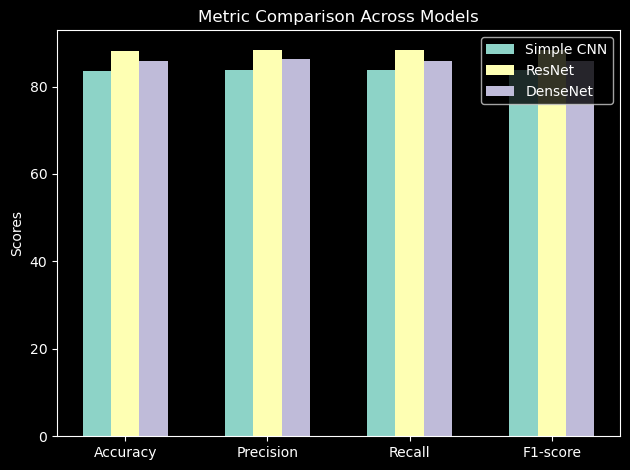

In [92]:
scnn_metrics = [scnn_accuracy, scnn_precision, scnn_recall, scnn_f1]
resnet_metrics = [resnet_accuracy, resnet_precision, resnet_recall, resnet_f1]
densenet_metrics = [densenet_accuracy, densenet_precision, densenet_recall, densenet_f1]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, scnn_metrics, width, label='Simple CNN')
rects2 = ax.bar(x, resnet_metrics, width, label='ResNet')
rects3 = ax.bar(x + width, densenet_metrics, width, label='DenseNet')

ax.set_ylabel('Scores')
ax.set_title('Metric Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


Parameters in Simple CNN: 2,121,638
Parameters in ResNet: 15,366,726
Parameters in DenseNet: 950,360


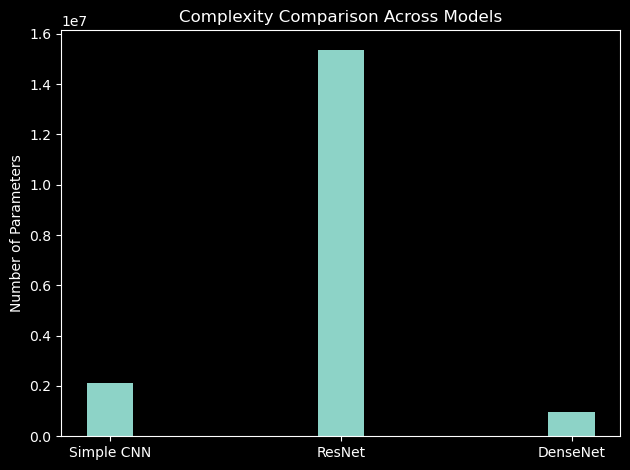

In [93]:
# Count parameters for models
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

n_params_scnn = count_parameters(best_simple_cnn_model)
n_params_resnet = count_parameters(best_resnet_model)
n_params_densenet = count_parameters(best_densenet_model)

print(f"Parameters in Simple CNN: {n_params_scnn:,}")
print(f"Parameters in ResNet: {n_params_resnet:,}")
print(f"Parameters in DenseNet: {n_params_densenet:,}")

# Visualize number of parameters in another bar chart
param_labels = ['Simple CNN', 'ResNet', 'DenseNet']
param_values = [n_params_scnn, n_params_resnet, n_params_densenet]

fig, ax = plt.subplots()

rects = ax.bar(param_labels, param_values, width)

# Add labels, title
ax.set_ylabel('Number of Parameters')
ax.set_title('Complexity Comparison Across Models')

fig.tight_layout()
plt.show()

## Analysis of Random Misclassified Images by All Models

In this section, we aim to investigate the instances where all the models under consideration (Simple CNN, ResNet, and DenseNet) failed to classify correctly. We will select random images that are misclassified by all three models to assess the models' weaknesses.

### Observations:

- Upon visual inspection, we find that there are certain classes that are commonly misclassified by all three models.
- Some of these misclassifications are ambiguous even to the human observer. For instance, distinguishing between "Street" and "Buildings" appears to be more of a dataset issue than a classifier limitation.

### Conclusions:

Our analysis reveals that even state-of-the-art models are not infallible and can struggle with ambiguous or poorly represented classes. While the models perform well on a majority of the classes, they stumble on these specific, challenging instances. 

It's worth considering whether the fault lies entirely with the models or if the dataset itself contributes to these errors. We leave it to the readers to draw their own conclusions on this matter.


Index: 2054, Image Path: data/test_set/sea/20622.jpg, True Label: sea
SCNN Prediction: street, ResNet Prediction: forest, DenseNet Prediction: street


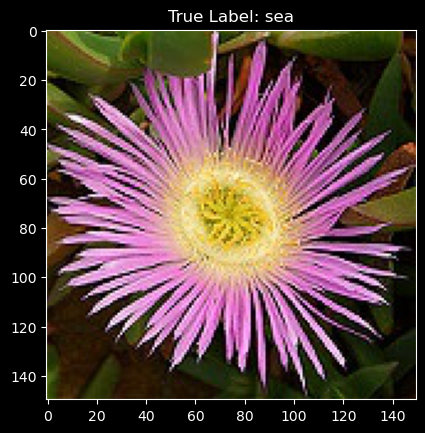

Index: 1543, Image Path: data/test_set/mountain/20732.jpg, True Label: mountain
SCNN Prediction: glacier, ResNet Prediction: glacier, DenseNet Prediction: glacier


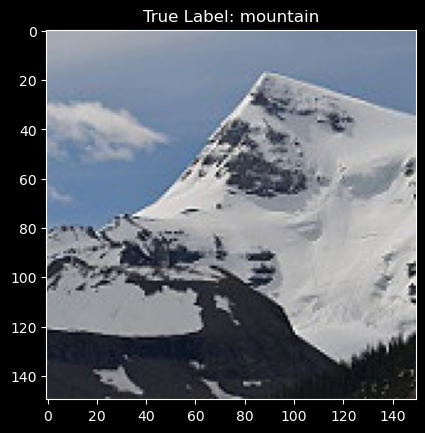

Index: 1032, Image Path: data/test_set/glacier/21027.jpg, True Label: glacier
SCNN Prediction: sea, ResNet Prediction: sea, DenseNet Prediction: sea


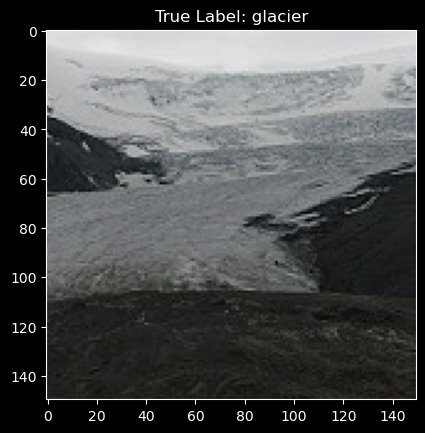

Index: 2567, Image Path: data/test_set/street/20537.jpg, True Label: street
SCNN Prediction: buildings, ResNet Prediction: buildings, DenseNet Prediction: buildings


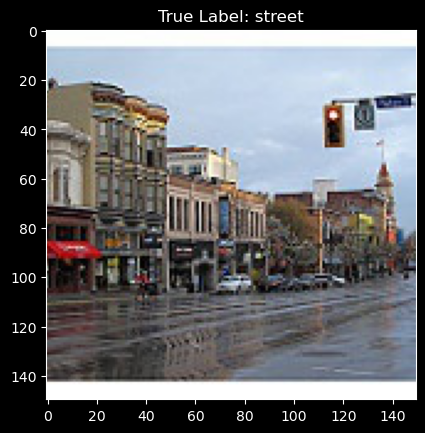

Index: 1034, Image Path: data/test_set/glacier/21042.jpg, True Label: glacier
SCNN Prediction: mountain, ResNet Prediction: mountain, DenseNet Prediction: mountain


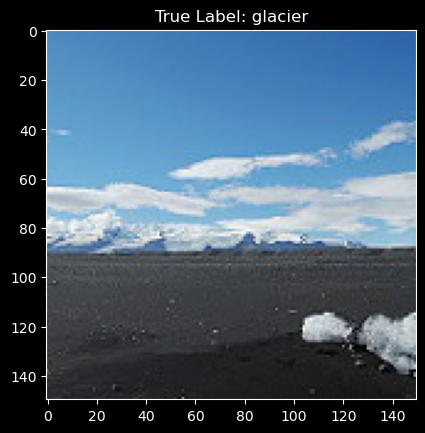

Index: 1549, Image Path: data/test_set/mountain/20783.jpg, True Label: mountain
SCNN Prediction: glacier, ResNet Prediction: glacier, DenseNet Prediction: glacier


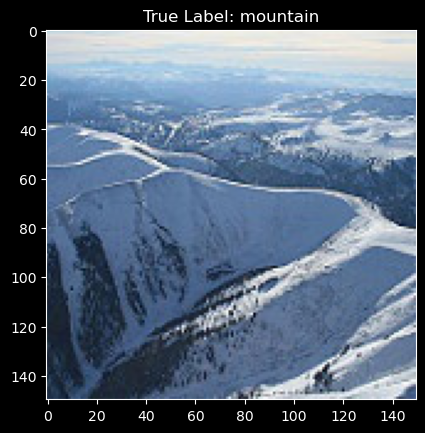

Index: 22, Image Path: data/test_set/buildings/20246.jpg, True Label: buildings
SCNN Prediction: street, ResNet Prediction: street, DenseNet Prediction: street


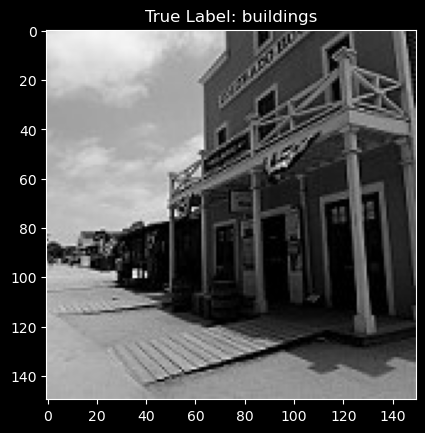

Index: 1046, Image Path: data/test_set/glacier/21129.jpg, True Label: glacier
SCNN Prediction: sea, ResNet Prediction: sea, DenseNet Prediction: sea


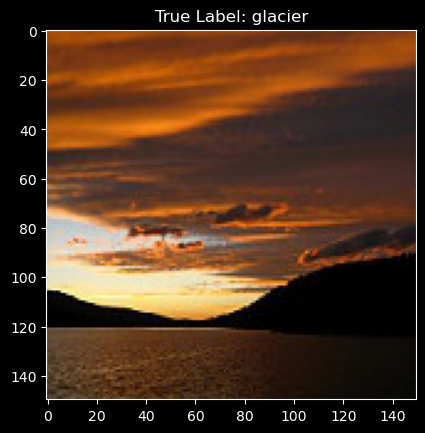

Index: 1560, Image Path: data/test_set/mountain/20876.jpg, True Label: mountain
SCNN Prediction: sea, ResNet Prediction: sea, DenseNet Prediction: sea


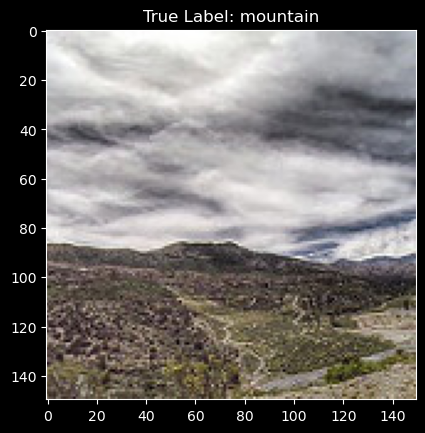

Index: 2584, Image Path: data/test_set/street/20683.jpg, True Label: street
SCNN Prediction: buildings, ResNet Prediction: buildings, DenseNet Prediction: buildings


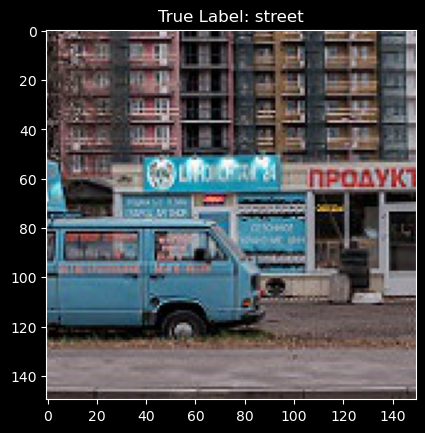

In [140]:
def get_common_wrong_predictions(labels1, predictions1, labels2, predictions2, labels3, predictions3):
    wrong_indices1 = [i for i, (true, pred) in enumerate(zip(labels1, predictions1)) if true != pred]
    wrong_indices2 = [i for i, (true, pred) in enumerate(zip(labels2, predictions2)) if true != pred]
    wrong_indices3 = [i for i, (true, pred) in enumerate(zip(labels3, predictions3)) if true != pred]
    
    # Find common wrong indices among all three sets of predictions
    common_wrong_indices = set(wrong_indices1).intersection(set(wrong_indices2), set(wrong_indices3))
    
    common_wrong_labels = [labels1[i] for i in common_wrong_indices]
    common_wrong_preds1 = [predictions1[i] for i in common_wrong_indices]
    common_wrong_preds2 = [predictions2[i] for i in common_wrong_indices]
    common_wrong_preds3 = [predictions3[i] for i in common_wrong_indices]
    
    return common_wrong_indices, common_wrong_labels, common_wrong_preds1, common_wrong_preds2, common_wrong_preds3

# Using the function to find common wrong predictions
common_wrong_indices, common_wrong_labels, scnn_common_wrong_preds, resnet_common_wrong_preds, densenet_common_wrong_preds = get_common_wrong_predictions(
    scnn_labels, scnn_predictions, resnet_labels, resnet_predictions, densenet_labels, densenet_predictions
)


test_transform = transforms.Compose(
        [
            transforms.ToTensor(),  # Convert PIL Image to PyTorch tensor
        ]
    )
test_dataset = ImageFolder(TEST_DIR, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True, num_workers=NUM_WORKERS)

# Choose a number of images to display (e.g., 5)
num_images_to_show = 10

idx_to_class =  ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

common_wrong_indices_list = list(common_wrong_indices)

# Display images
for i in range(num_images_to_show):
    index = common_wrong_indices_list[i]
    true_label_idx = common_wrong_labels[i]
    true_class_name = idx_to_class[true_label_idx]

    # Retrieve the image file path
    img_path, _ = test_loader.dataset.samples[index]

    print(f"Index: {index}, Image Path: {img_path}, True Label: {true_class_name}")
    
    scnn_pred_class_name = idx_to_class[scnn_common_wrong_preds[i]]
    resnet_pred_class_name = idx_to_class[resnet_common_wrong_preds[i]]
    densenet_pred_class_name = idx_to_class[densenet_common_wrong_preds[i]]
    
    print(f"SCNN Prediction: {scnn_pred_class_name}, ResNet Prediction: {resnet_pred_class_name}, DenseNet Prediction: {densenet_pred_class_name}")
    
    img, _ = test_loader.dataset[index]
    img_show = transforms.ToPILImage()(img).convert("RGB")
    
    plt.title(f"True Label: {true_class_name}")
    plt.imshow(img_show)
    plt.show()


## Final Conclusion

### Summary:

Throughout this project, we have delved into image classification using different neural network architectures—Simple CNN, ResNet, and DenseNet. Our journey started with data preprocessing and augmentation, followed by model training, optimization, and finally, an in-depth evaluation using various metrics such as accuracy, precision, recall, and F1 score.

### Key Observations:

- All the models performed exceptionally well, with ResNet showing the highest accuracy among the three. 
- Despite implementing early stopping, no noticeable overfitting was observed across the models. 
- Upon investigating misclassified instances, we found that all models tripped up on similar ambiguous classes, suggesting that the challenge may lie in the dataset itself rather than the models.
- A surprising aspect was the parameter-to-performance ratio. DenseNet, despite having fewer parameters compared to ResNet, did not lag far behind in terms of performance, validating the efficacy of its dense connections as stated in the original paper.

### Technological Implications:

- ResNet, with its higher complexity, does offer better accuracy but at the cost of computational resources.
- DenseNet offers a good trade-off between performance and computational complexity, making it a suitable choice for constrained environments.

### Future Work:

- To improve performance, further hyperparameter tuning and optimization can be explored.
- Incorporating additional data or utilizing transfer learning with more extensive pre-trained models could potentially boost accuracy.
  
### Concluding Remarks:

The work demonstrates the ever-growing capabilities of neural network architectures in image classification tasks. While models continue to advance, the critical role of good-quality data and meaningful features cannot be overlooked. It's a symbiotic relationship that needs to be nurtured for achieving optimum results. Overall, the project has provided valuable insights into the behavior and performance of different architectures and offers a launching pad for more advanced, targeted studies in this realm.
